
# Project: Investigate a Dataset - Lung cancer data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#posquestions">Possible questions</a></li>
<li><a href="#func">0. Extra functions</a></li>
<li><a href="#wrangling">1. Data Wrangling</a></li>
<li><a href="#eda1d">2. Exploratory Data Analysis - Single variable (1d)</a></li>
<li><a href="#eda2d">3. Exploratory Data Analysis - Multi variable (2d)</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The following data sets from gapminder is considered in this data analysis project:

**Lung cancer, death per 100,000 women:** Number of death due to lung cancer in 100,000 female residents during the certain year. This rate is calculated as if each country has the same age composition as the world population.

**Lung cancer, death per 100,000 men:** Number of death due to lung cancer in 100,000 male residents during the certain year. This rate is calculated as if each country has the same age composition as the world population.

**Lung cancer, new cases per 100,000 women:** Number of new cases of lung cancer in 100,000 female residens during the certain year. This rate is calculated as if each country has the same age composition as the world population.

**Lung cancer, new cases per 100,000 men:** Number of new cases of lung cancer in 100,000 male residens during the certain year. This rate is calculated as if each country has the same age composition as the world population.

**Income per person (GDP/capia, PPP$ inflation-adjusted):** Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP)

**Country-continent data** are taken from here: https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv

<a id='posquestions'></a>
## Possible questions

- Is there any differenc/similarities in death rate due to cancer between female and male data? 
- Is there any dependencies between new cases and death rate? 
- Which country has the highest/ lowest death rate due to lung cancer? 
- Is there dependency between death rate due to lung cancer and income? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns - seaborn isn't installed correctly on my PC, so I commented this cell
%matplotlib inline

In [2]:
# load data
df_death_f=pd.read_csv('lung_cancer_deaths_per_100000_women.csv')#  index_col='country')
df_death_m=pd.read_csv('lung_cancer_deaths_per_100000_men.csv')
df_new_f=pd.read_csv('lung_cancer_new_cases_per_100000_women.csv')
df_new_m=pd.read_csv('lung_cancer_new_cases_per_100000_men.csv')
df_countries=pd.read_csv('Countries-Continents.csv')
df_income=pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_new_f.head(2) # check how data looks like

,country,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.97,9.04,9.12,9.22,9.27,9.35,9.43,9.50,9.56,9.63
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.70,10.50,10.30,10.00,9.94,9.86,9.79,9.72,9.66,9.59


<a id='func'></a>
## 0. Extra functions

### 0.1 Function to count countries with mininun and maximum cancer rate per year

In [3]:
def min_max_cancer_rate(df):
    #find countries where the rate of death due to cancer is minimum
    list1=[]
    for i in range(1,df.shape[1]): 
        list1.append(df.iloc[df.iloc[:,i].idxmin(),0])
    print ('Frequesncy of countries with minimum cancer rate')    
    print (pd.Series(list1).value_counts())
    
    #find countries where the rate of death due to cancer is maximum
    list1=[]
    for i in range(1,df.shape[1]): 
        list1.append(df.iloc[df.iloc[:,i].idxmax(),0])
    print ('Frequesncy of countries with maximum cancer rate')  
    print (pd.Series(list1).value_counts())

### 0.2 Function to transpose df

In [4]:
def transpose_df_func(df): 
    df1 = df.T # transpose df
    df1['year']=df1.index # add 'year'-column 
    df1.reset_index(drop=True,inplace=True) #reset row index 

    # put 'year'-column in front
    df1=df1[list(df1.columns)[-1:]+list(df1.columns)[:-1]] 

    #new columns names
    column_names=df1.iloc[0,:].tolist()
    df1.columns=['year']+column_names[1:] 
    df1.drop(df1.index[0], inplace=True) # drop row with countries names
    df1.head(2)

    # change type format for 'year'-column
    df1['year']=df1['year'].astype(int)
    return df1

### 0.3 Function to plot data per year per country/continent column

In [5]:
def plot_country_year(df, list_of_countries ):
    x=df['year']
    y=df[list_of_countries]

    plt.figure(figsize=(15,7))
    plt.plot(x,y)
    plt.legend(list_of_countries)
    plt.xlabel('Year')
    plt.ylabel('Rate');

<a id='wrangling'></a>
## 1. Data Wrangling


### 1.1 Data preparation

there is a lot of NAN values in each data set, let's remove all NAN columns

In [6]:
df_death_f.dropna(axis=1,inplace=True)
df_new_f.dropna(axis=1,inplace=True)
df_death_m.dropna(axis=1,inplace=True)
df_new_m.dropna(axis=1,inplace=True)
df_income.dropna(axis=1,inplace=True)
df_countries.dropna(axis=1,inplace=True)
df_new_f.head(2)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,9.94,9.84,9.76,9.66,9.55,9.49,9.34,9.22,9.12,...,8.97,9.04,9.12,9.22,9.27,9.35,9.43,9.50,9.56,9.63
1,Albania,8.60,8.76,8.87,9.08,9.37,9.67,10.30,10.80,11.30,...,10.70,10.50,10.30,10.00,9.94,9.86,9.79,9.72,9.66,9.59


In [7]:
print('Shape of death female df', df_death_f.shape)
print('Shape of new female df', df_new_f.shape)
print('Shape of death male df', df_death_m.shape)
print('Shape of new male df', df_new_m.shape)
print('Shape of income df', df_income.shape)
print('Total countries', df_countries.shape[0])

Shape of death female df (187, 25)
Shape of new female df (187, 28)
Shape of death male df (187, 25)
Shape of new male df (187, 28)
Shape of income df (193, 220)
Total countries 194


*Rows:*
Data sets with cancer data has the same amount of rows. Should check that countries are identic in these dataframes. 
Contries/continents and income data has apperently more countries. To compare this dataframes with cancer df the same countries should be used. 

*Columns:*
Data sets has different number of columns, to compare data sets we will used the same years only.

In [8]:
df_death_m.head(1)

,country,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,31.4,31.7,31.8,31.9,32.0,32.0,32.1,32.1,32.5,...,33.4,33.3,33.2,33.1,33.1,33.1,33.2,33.4,33.5,33.7


In [9]:
df_new_m.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,25.2,25.2,25.3,25.4,25.5,25.6,25.6,25.6,25.6,...,25.6,25.5,25.4,25.3,25.2,25.2,25.2,25.3,25.3,25.4


New cases and death cases are for different years, let's remove 1990 up to 1993 from new cases df

In [10]:
# remove first 3 year columns from new cases df
df_new_f.drop(df_new_f.iloc[:, 1:4], inplace=True, axis=1)
df_new_f.head(1)

,country,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,9.66,9.55,9.49,9.34,9.22,9.12,9.05,9.02,8.92,...,8.97,9.04,9.12,9.22,9.27,9.35,9.43,9.5,9.56,9.63


In [11]:
# check that columns and country-rows are the same
(df_new_f.columns==df_death_f.columns).any(),  (df_new_f['country']==df_death_f['country']).any()

(True, True)

In [12]:
# drop first 3 years from df
df_new_m.drop(df_new_m.iloc[:, 1:4], inplace=True, axis=1)
df_new_m.head(1)

,country,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,25.4,25.5,25.6,25.6,25.6,25.6,25.5,25.5,25.6,...,25.6,25.5,25.4,25.3,25.2,25.2,25.2,25.3,25.3,25.4


In [13]:
# check if columns and row names are the same 
(df_new_m.columns==df_death_m.columns).any() , (df_new_m['country']==df_death_m['country']).any()

(True, True)

### 1.2. Join data with continent data

In [14]:
# sort df_countries per country name
df_countries=df_countries.sort_values('Country')
df_countries.reset_index(drop=True,inplace=True) #reset row index 
#df_countries['Country']

In [15]:
df_countries['Continent'].value_counts()

Africa           54
Europe           47
Asia             44
North America    23
Oceania          14
South America    12
Name: Continent, dtype: int64

**Manipulate female death rate df**

In [16]:
# Combine cancer dataframe and countries/continents dataframe (on country column)
df_death_f_combined=df_death_f.merge(df_countries, how='left', left_on='country', right_on='Country')

In [17]:
# check which countries doesn't corespond in two df
df_death_f_combined[df_death_f_combined['Country'].isnull()][['country','Country', 'Continent']]

,country,Country,Continent
26,Burkina Faso,NaN,NaN
38,"Congo, Dem. Rep.",NaN,NaN
39,"Congo, Rep.",NaN,NaN
41,Cote d'Ivoire,NaN,NaN
45,Czech Republic,NaN,NaN
89,Kyrgyz Republic,NaN,NaN
90,Lao,NaN,NaN
98,"Macedonia, FYR",NaN,NaN
109,"Micronesia, Fed. Sts.",NaN,NaN
115,Myanmar,NaN,NaN


In [18]:
# make list of continents for missing countries
list2=['Africa','Africa', 'Africa', 'Africa', 'Europe', 'Asia', 'Asia', 'Europe', 'Oceania', 'Asia', 'Asia', 'Asia', 'Asia','Europe', 'Asia', 'North America', 'North America', 'Asia', 'North America' ]
len(list2)

19

Assign continents to missing values 

In [19]:
# assign continents to missing values 
df_death_f_combined.loc[df_death_f_combined['Continent'].isnull(), 'Continent']=list2
# check if it fills correctly 
df_death_f_combined[df_death_f_combined['Country'].isnull()][['country','Country', 'Continent']]

,country,Country,Continent
26,Burkina Faso,NaN,Africa
38,"Congo, Dem. Rep.",NaN,Africa
39,"Congo, Rep.",NaN,Africa
41,Cote d'Ivoire,NaN,Africa
45,Czech Republic,NaN,Europe
89,Kyrgyz Republic,NaN,Asia
90,Lao,NaN,Asia
98,"Macedonia, FYR",NaN,Europe
109,"Micronesia, Fed. Sts.",NaN,Oceania
115,Myanmar,NaN,Asia


In [20]:
# delete 'Country'- column
df_death_f_combined.drop('Country', inplace=True, axis=1)
df_death_f_combined.head(2)

,country,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Continent
0,Afghanistan,11.60,11.5,11.4,11.3,11.2,11.1,11.1,11.0,11.0,...,11.5,11.6,11.7,11.8,12.0,12.1,12.2,12.3,12.4,Asia
1,Albania,9.62,9.9,10.2,10.8,11.4,11.9,12.4,12.9,12.9,...,11.2,10.9,10.6,10.5,10.4,10.3,10.2,10.1,10.0,Europe


**Manipulate male death rate df**

In [21]:
# Combine cancer dataframe and countries/continents dataframe (on country column)
df_death_m_combined=df_death_m.merge(df_countries, how='left', left_on='country', right_on='Country')

In [22]:
# check which countries doesn't corespond in two df
df_death_m_combined[df_death_m_combined['Country'].isnull()][['country','Country', 'Continent']]

,country,Country,Continent
26,Burkina Faso,NaN,NaN
38,"Congo, Dem. Rep.",NaN,NaN
39,"Congo, Rep.",NaN,NaN
41,Cote d'Ivoire,NaN,NaN
45,Czech Republic,NaN,NaN
89,Kyrgyz Republic,NaN,NaN
90,Lao,NaN,NaN
98,"Macedonia, FYR",NaN,NaN
109,"Micronesia, Fed. Sts.",NaN,NaN
115,Myanmar,NaN,NaN


List of missing countries is the same as for female data

In [23]:
# assign continents to missing values 
df_death_m_combined.loc[df_death_m_combined['Continent'].isnull(), 'Continent']=list2
# check if it fills correctly 
df_death_m_combined[df_death_m_combined['Country'].isnull()][['country','Country', 'Continent']]
# delete 'Country'- column
df_death_m_combined.drop('Country', inplace=True, axis=1)
df_death_m_combined.head(2)

,country,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Continent
0,Afghanistan,31.4,31.7,31.8,31.9,32.0,32.0,32.1,32.1,32.5,...,33.3,33.2,33.1,33.1,33.1,33.2,33.4,33.5,33.7,Asia
1,Albania,47.4,47.6,48.5,49.1,50.3,51.2,51.8,52.5,52.1,...,48.4,48.0,46.9,46.4,46.1,46.0,46.1,46.2,46.3,Europe


### 1.3. Prepare income dataframe

In [24]:
df_income.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870
1,Albania,667,667,667,667,667,668,668,668,668,...,9530,9930,10200,10400,10500,10700,11000,11400,11900,12400


Use only years between 1993 and 2016, remove not used countries in cancer dataframes

In [25]:
#df_life_expectancy.iloc[:, df_life_expectancy.columns.get_loc("1993"):df_life_expectancy.columns.get_loc("2016")+1]
df_income_clean=df_income.loc[:, "1993":"2016"]
df_income_clean['country']=df_income['country']
# put 'country'-column in front
df_income_clean=df_income_clean[list(df_income_clean.columns)[-1:]+list(df_income_clean.columns)[:-1]] 
df_income_clean.head(2)

,country,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,818,732,881,904,930,956,982,972,871,...,1290,1300,1530,1610,1660,1840,1810,1780,1750,1740
1,Albania,3320,3620,4130,4530,4070,4460,5100,5470,5960,...,8450,9150,9530,9930,10200,10400,10500,10700,11000,11400


In [26]:
df_income_clean.isnull().any().any()

False

In [27]:
# check that countries order is the same if not then clean not used countries in df_income
df_country_names=df_death_f[['country', '2016']]
df_country_names.columns = ['country','2016_x']
df_country_names
df_income_clean=df_income_clean.merge(df_country_names, how='inner', left_on='country', right_on='country')
df_income_clean.drop('2016_x', inplace=True, axis=1)
df_income_clean.shape

(187, 25)

<a id='eda1d'></a>
## 2. Exploratory Data Analysis - Single variable (1d)

### 2.1. Analyse data of women death due to lung cancer

In [28]:
df_death_f.head(2)

,country,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,11.60,11.5,11.4,11.3,11.2,11.1,11.1,11.0,11.0,...,11.4,11.5,11.6,11.7,11.8,12.0,12.1,12.2,12.3,12.4
1,Albania,9.62,9.9,10.2,10.8,11.4,11.9,12.4,12.9,12.9,...,11.4,11.2,10.9,10.6,10.5,10.4,10.3,10.2,10.1,10.0


In [29]:
# check that all data elements are in correct format
df_death_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 25 columns):
country    187 non-null object
1993       187 non-null float64
1994       187 non-null float64
1995       187 non-null float64
1996       187 non-null float64
1997       187 non-null float64
1998       187 non-null float64
1999       187 non-null float64
2000       187 non-null float64
2001       187 non-null float64
2002       187 non-null float64
2003       187 non-null float64
2004       187 non-null float64
2005       187 non-null float64
2006       187 non-null float64
2007       187 non-null float64
2008       187 non-null float64
2009       187 non-null float64
2010       187 non-null float64
2011       187 non-null float64
2012       187 non-null float64
2013       187 non-null float64
2014       187 non-null float64
2015       187 non-null float64
2016       187 non-null float64
dtypes: float64(24), object(1)
memory usage: 36.6+ KB


In [30]:
# Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df_death_f.describe()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,9.700856,9.789947,9.884973,9.906096,9.959733,9.986096,10.039144,10.118824,10.146845,10.197487,...,10.488663,10.524813,10.545561,10.573048,10.551925,10.546417,10.524332,10.486898,10.444759,10.401551
std,6.914329,7.040805,7.152617,7.182989,7.214484,7.239297,7.300039,7.352780,7.379503,7.429733,...,7.610475,7.604511,7.588918,7.569592,7.497799,7.430575,7.344727,7.267991,7.176756,7.082883
min,2.370000,2.360000,2.350000,2.400000,2.460000,2.510000,2.540000,2.560000,2.570000,2.580000,...,2.750000,2.790000,2.820000,2.850000,2.890000,2.940000,2.960000,2.950000,2.960000,2.950000
25%,5.285000,5.180000,5.160000,5.170000,5.115000,5.150000,5.145000,5.160000,5.125000,5.175000,...,5.285000,5.310000,5.320000,5.385000,5.305000,5.330000,5.340000,5.290000,5.310000,5.325000
50%,7.710000,7.860000,7.730000,7.680000,7.770000,7.810000,7.960000,7.940000,8.030000,8.050000,...,8.300000,8.370000,8.450000,8.560000,8.700000,8.620000,8.620000,8.530000,8.550000,8.480000
75%,11.800000,11.850000,12.000000,12.100000,11.950000,12.100000,12.250000,12.200000,12.150000,12.350000,...,12.700000,12.800000,12.800000,12.750000,12.750000,12.700000,12.750000,12.750000,12.700000,12.550000
max,50.900000,50.600000,50.300000,49.700000,49.100000,48.500000,48.000000,47.400000,47.100000,46.800000,...,45.600000,45.300000,45.000000,44.700000,44.300000,44.000000,43.600000,43.300000,43.000000,42.600000


Plot histograms for some year, here I used 1993, 2000, 2008 and 2016

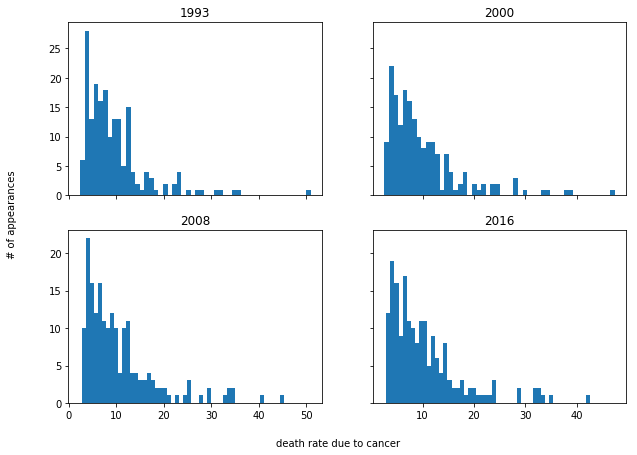

In [31]:
# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,7))

ax1.hist(df_death_f['1993'], bins=50);
ax1.set_title('1993')
ax2.hist(df_death_f['2000'], bins=50);
ax2.set_title('2000')
ax3.hist(df_death_f['2008'], bins=50);
ax3.set_title('2008')
ax4.hist(df_death_f['2016'], bins=50);
ax4.set_title('2016')

f.text(0.5, 0.04, 'death rate due to cancer', ha='center')
f.text(0.04, 0.5, '# of appearances', va='center', rotation='vertical');

Distribution for different years looks similar, skewed right

Let's find countries with maximum and minimum death rate due to lung cancer and it's appearances per year

In [32]:
min_max_cancer_rate(df_death_f)

Frequesncy of countries with minimum cancer rate
Djibouti    20
Nigeria      4
dtype: int64
Frequesncy of countries with maximum cancer rate
North Korea    24
dtype: int64


#### Plot cancer data for some cities per year

In [33]:
df_death_f_transpose=transpose_df_func(df_death_f)

In [34]:
# add column with mean value per all countries
df_death_f_transpose['all_countries']=df_death_f_transpose.iloc[:, 1:].mean(axis=1)

Here I've chosen to plot data from countries with min/max cancer rate, average for all countries, and few more, such as: Russia, USA, China, the Netherlands, India 

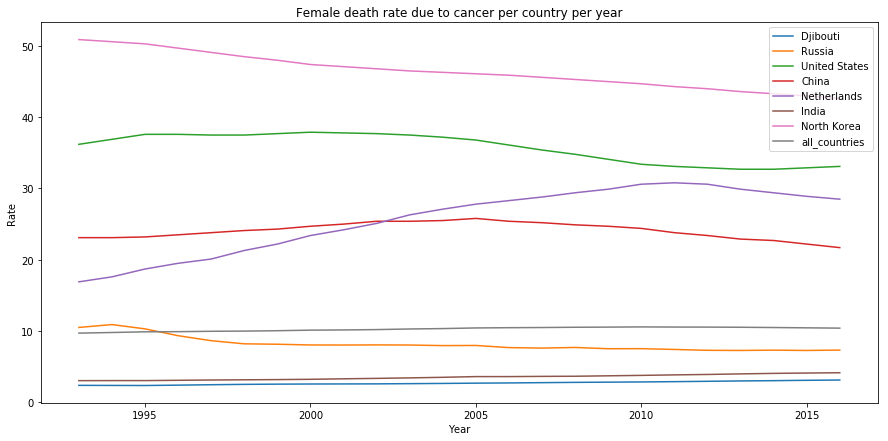

In [35]:
list_of_countries=['Djibouti', 'Russia', 'United States', 'China','Netherlands', 'India', 'North Korea', 'all_countries']
plot_country_year(df_death_f_transpose, list_of_countries )
plt.title('Female death rate due to cancer per country per year');

In [36]:
#df_death_f_transpose.iloc[:, 1:].sum(axis=1)/(df_death_f_transpose.shape[1]-1)==df_death_f_transpose.iloc[:, 1:].mean(axis=1)

**Group by continets**

Generate mean death rate data per continent per year

In [37]:
df_mean_death_f_continent=df_death_f_combined.groupby('Continent').mean()
#df5_min=df_death_f_combined.groupby('Continent').min()
#df5_min.drop('country', inplace=True, axis=1)
#df5_max=df_death_f_combined.groupby('Continent').max()
#df5_max.drop('country', inplace=True, axis=1)
df_mean_death_f_continent

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,5.175926,5.183889,5.186111,5.229259,5.280000,5.342222,5.394259,5.461481,5.483519,5.518704,...,5.619259,5.621481,5.628333,5.634074,5.649815,5.692963,5.729259,5.773333,5.818333,5.862037
Asia,11.259111,11.303556,11.373333,11.306444,11.255556,11.184000,11.096889,11.063333,10.966667,10.902444,...,10.832889,10.816222,10.780889,10.766000,10.700000,10.663333,10.640667,10.638889,10.621556,10.607778
Europe,13.006512,13.233953,13.410233,13.512326,13.653721,13.822326,14.039070,14.276279,14.448372,14.632558,...,15.706977,15.880698,16.010465,16.125349,16.059070,16.000698,15.850698,15.653023,15.424186,15.211395
North America,10.212727,10.264545,10.434545,10.391364,10.508636,10.456818,10.462727,10.521818,10.529091,10.562273,...,10.575000,10.539091,10.486364,10.458636,10.494545,10.533636,10.598636,10.589545,10.630000,10.660000
Oceania,11.888182,12.054545,12.157273,12.280000,12.345455,12.335455,12.510909,12.581818,12.580909,12.583636,...,12.612727,12.579091,12.537273,12.510909,12.468182,12.406364,12.364545,12.315455,12.291818,12.229091
South America,9.430833,9.554167,9.725833,9.712500,9.729167,9.628333,9.599167,9.640833,9.711667,9.860000,...,10.305833,10.395833,10.490833,10.612500,10.670833,10.722500,10.756667,10.751667,10.725000,10.671667


In [38]:
# add continent column == index column
def add_continent(df):
    df['Continent']=df.index # add 'Continent'-column 
    df.reset_index(drop=True,inplace=True) #reset row index 
    # put 'Continent'-column in front
    df=df[list(df.columns)[-1:]+list(df.columns)[:-1]] 
    return df

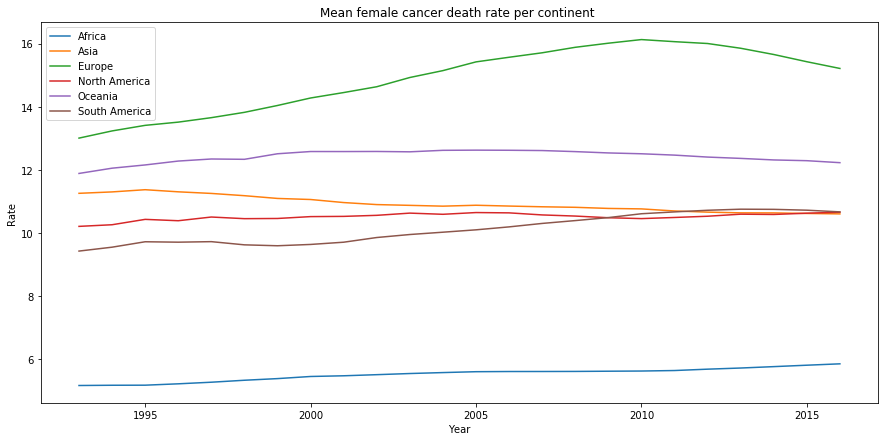

In [39]:
df_mean_death_f_continent=add_continent(df_mean_death_f_continent)
df_mean_death_f_continent_t=transpose_df_func(df_mean_death_f_continent)
plot_country_year(df_mean_death_f_continent_t,df_mean_death_f_continent_t.columns[1:])
plt.title('Mean female cancer death rate per continent ');

**Make boxplots per continent**

In [40]:
# change year column to float type
df_mean_death_f_continent_t=df_mean_death_f_continent_t.astype(float)
df_mean_death_f_continent_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1 to 24
Data columns (total 7 columns):
year             24 non-null float64
Africa           24 non-null float64
Asia             24 non-null float64
Europe           24 non-null float64
North America    24 non-null float64
Oceania          24 non-null float64
South America    24 non-null float64
dtypes: float64(7)
memory usage: 1.5 KB


In [41]:
df_mean_death_f_continent_t.describe()

,year,Africa,Asia,Europe,North America,Oceania,South America
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2004.500000,5.527323,10.926991,14.875426,10.517822,12.419735,10.124132
std,7.071068,0.204863,0.245267,1.024251,0.113092,0.198359,0.462481
min,1993.000000,5.175926,10.607778,13.006512,10.212727,11.888182,9.430833
25%,1998.750000,5.381250,10.749500,13.984884,10.461705,12.309545,9.712292
50%,2004.500000,5.598889,10.867000,15.177093,10.531364,12.489545,10.065833
75%,2010.250000,5.638009,11.118667,15.742907,10.595909,12.581136,10.627083
max,2016.000000,5.862037,11.373333,16.125349,10.660000,12.625455,10.756667


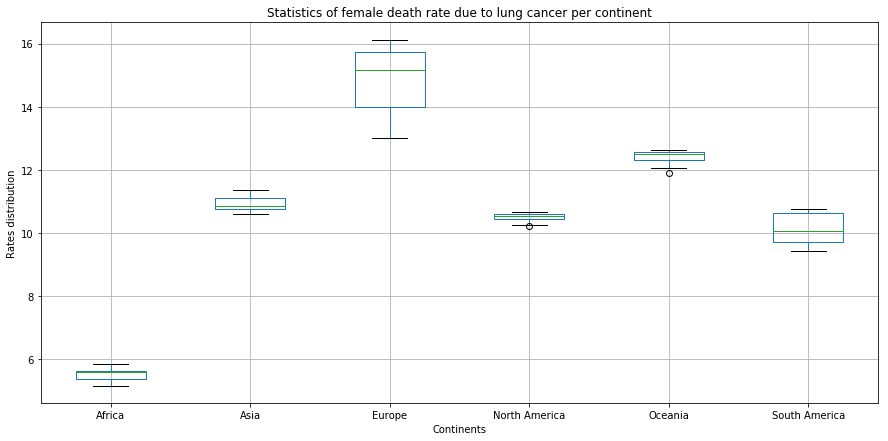

In [42]:
df_mean_death_f_continent_t.boxplot(column=list(df_mean_death_f_continent_t.columns[1:].values), figsize=(15,7));
# Add title and axis names
plt.title('Statistics of female death rate due to lung cancer per continent')
plt.xlabel('Continents')
plt.ylabel('Rates distribution');


**Countries in Africa has the lowest female death rate due to lung cancer. The highest female death rate due to lung cancer is in Europe.**

Per continent death rate has different behavior (skewed left/right)

### 2.2. Analyse data for men death rate due to lung cancer

In [43]:
df_death_m.head(2)

,country,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,31.4,31.7,31.8,31.9,32.0,32.0,32.1,32.1,32.5,...,33.4,33.3,33.2,33.1,33.1,33.1,33.2,33.4,33.5,33.7
1,Albania,47.4,47.6,48.5,49.1,50.3,51.2,51.8,52.5,52.1,...,48.6,48.4,48.0,46.9,46.4,46.1,46.0,46.1,46.2,46.3


In [44]:
# check that all data elements are in correct format
df_death_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 25 columns):
country    187 non-null object
1993       187 non-null float64
1994       187 non-null float64
1995       187 non-null float64
1996       187 non-null float64
1997       187 non-null float64
1998       187 non-null float64
1999       187 non-null float64
2000       187 non-null float64
2001       187 non-null float64
2002       187 non-null float64
2003       187 non-null float64
2004       187 non-null float64
2005       187 non-null float64
2006       187 non-null float64
2007       187 non-null float64
2008       187 non-null float64
2009       187 non-null float64
2010       187 non-null float64
2011       187 non-null float64
2012       187 non-null float64
2013       187 non-null float64
2014       187 non-null float64
2015       187 non-null float64
2016       187 non-null float64
dtypes: float64(24), object(1)
memory usage: 36.6+ KB


In [45]:
# Generate descriptive statistics
df_death_m.describe()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,187.000000,187.000000,187.00000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,36.151658,36.209251,36.10615,35.508289,34.992086,34.677380,34.433850,34.162888,33.910909,33.695455,...,32.488128,32.132781,31.795508,31.487326,31.054759,30.746845,30.367968,30.092299,29.869251,29.698984
std,26.522782,26.601245,26.30150,25.470957,24.875329,24.593748,24.351383,23.978792,23.761661,23.471282,...,21.916683,21.405464,20.924110,20.508919,20.028709,19.642194,19.172041,18.794484,18.472312,18.196589
min,4.810000,5.050000,5.11000,5.210000,5.270000,5.410000,5.350000,5.480000,5.310000,5.270000,...,5.200000,5.260000,5.320000,5.350000,5.460000,5.550000,5.580000,5.640000,5.710000,5.840000
25%,15.100000,15.300000,14.80000,14.850000,14.550000,14.300000,14.250000,14.050000,13.650000,13.600000,...,13.400000,13.400000,13.500000,13.500000,13.500000,13.250000,12.800000,13.000000,13.000000,12.950000
50%,28.700000,28.900000,29.40000,28.800000,27.700000,28.500000,27.900000,27.800000,27.400000,27.200000,...,27.300000,27.100000,26.500000,26.300000,26.000000,26.000000,25.800000,25.600000,25.600000,25.500000
75%,52.900000,53.250000,53.25000,52.150000,51.700000,51.500000,51.500000,50.150000,49.500000,48.750000,...,44.450000,44.650000,44.800000,44.950000,44.750000,43.650000,43.450000,43.500000,42.900000,42.850000
max,105.000000,107.000000,105.00000,106.000000,105.000000,104.000000,103.000000,102.000000,101.000000,102.000000,...,99.300000,98.300000,96.700000,95.000000,94.300000,93.700000,93.000000,92.400000,91.700000,91.000000


Plot histograms for some year, here I used 1993, 2000, 2008 and 2016

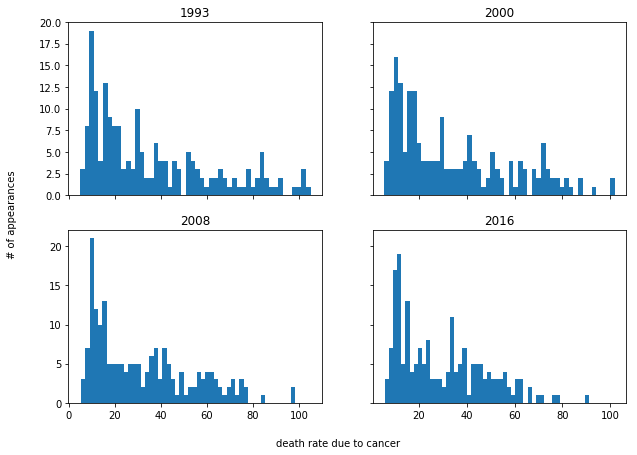

In [46]:
# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,7))

ax1.hist(df_death_m['1993'], bins=50);
ax1.set_title('1993')
ax2.hist(df_death_m['2000'], bins=50);
ax2.set_title('2000')
ax3.hist(df_death_m['2008'], bins=50);
ax3.set_title('2008')
ax4.hist(df_death_m['2016'], bins=50);
ax4.set_title('2016')

f.text(0.5, 0.04, 'death rate due to cancer', ha='center')
f.text(0.04, 0.5, '# of appearances', va='center', rotation='vertical');

Distributions for different years skewed left, but with way longer tale that the similar histograms for female

Let's find countries with max/min death rate due to lung cancer and number of its appearances. 
It it the same countries as in female dataframe?

In [47]:
min_max_cancer_rate(df_death_m)

Frequesncy of countries with minimum cancer rate
Kenya     23
Zambia     1
dtype: int64
Frequesncy of countries with maximum cancer rate
North Korea    12
Hungary        11
Russia          1
dtype: int64


Countries with max/min death rate due to lung cancer are different between female and male population

**Plot cancer data for some cities per year**

In [48]:
# transpose df to have countries as columns 
df_death_m_t=transpose_df_func(df_death_m)

In [49]:
# add column with mean value per all countries
df_death_m_t['all_countries']=df_death_m_t.iloc[:, 1:].mean(axis=1)

Here I've chosen to plot data from countries with min/max cancer rate, average for all countries, and few more, such as: Russia, USA, China, the Netherlands, India 

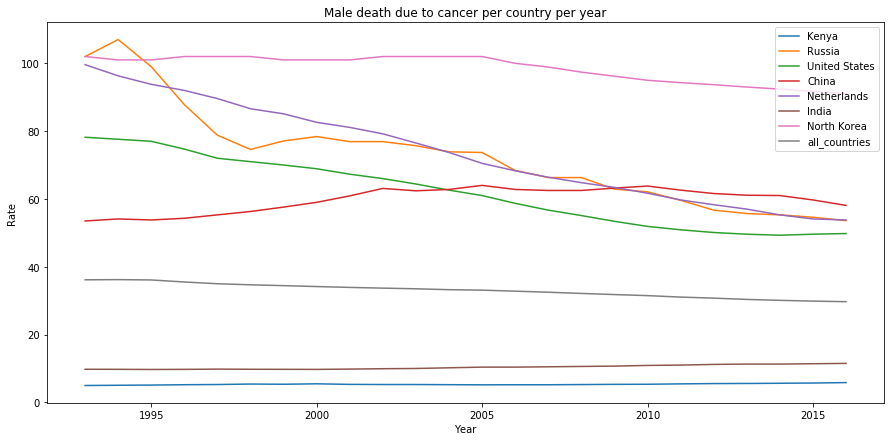

In [50]:
list_of_countries=['Kenya', 'Russia', 'United States', 'China','Netherlands', 'India', 'North Korea', 'all_countries']
plot_country_year(df_death_m_t, list_of_countries )
plt.title('Male death due to cancer per country per year');

**Group by continets**

Generate mean death rate data per continent per year

In [51]:
df_mean_death_m_continent=df_death_m_combined.groupby('Continent').mean()
#df5_min=df_death_f_combined.groupby('Continent').min()
#df5_min.drop('country', inplace=True, axis=1)
#df5_max=df_death_f_combined.groupby('Continent').max()
#df5_max.drop('country', inplace=True, axis=1)
df_mean_death_m_continent

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,16.437037,16.478148,16.586296,16.558333,16.509074,16.510556,16.478148,16.545556,16.437778,16.377593,...,16.461111,16.531111,16.579444,16.629259,16.637222,16.700926,16.759444,16.830000,16.893519,16.985741
Asia,35.690444,35.926667,35.956444,35.373556,34.891556,34.516889,34.414889,34.315556,34.160667,34.236667,...,33.488667,33.149778,33.003333,32.934667,32.696222,32.406889,32.215778,32.061556,31.962000,31.948889
Europe,68.679070,68.660465,68.018605,66.346512,65.020930,64.288372,63.525581,62.602326,62.058140,61.351163,...,58.158140,57.188372,56.090698,55.116279,53.732558,52.811628,51.458140,50.406977,49.502326,48.746512
North America,26.163182,26.245909,26.397727,26.167727,25.918636,25.806364,25.656364,25.390909,25.148636,24.905000,...,23.149545,22.755000,22.419091,22.013182,21.790909,21.654545,21.604091,21.675909,21.677727,21.649091
Oceania,35.636364,35.500000,35.200000,34.909091,34.581818,34.136364,34.036364,33.709091,33.354545,33.136364,...,32.345455,32.218182,32.018182,31.872727,31.636364,31.363636,31.100000,30.963636,31.009091,30.909091
South America,28.825000,28.691667,28.783333,28.458333,27.950000,27.683333,27.516667,27.458333,27.316667,27.125000,...,26.125000,25.858333,25.666667,25.266667,24.966667,24.766667,24.500000,24.225000,24.033333,23.866667


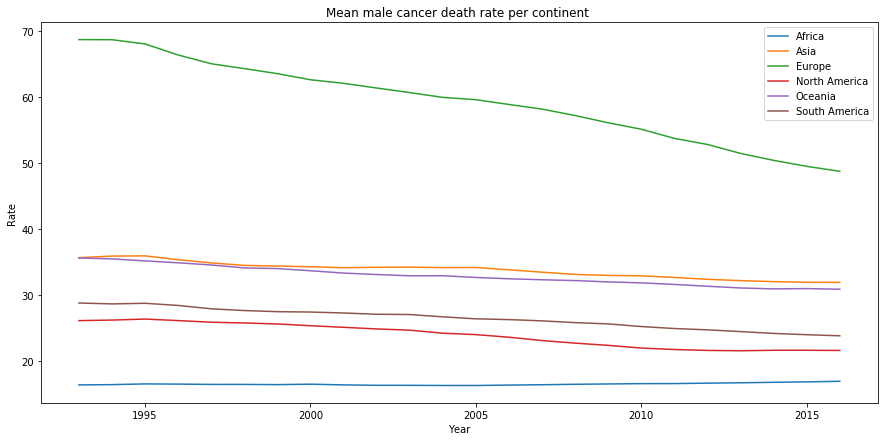

In [52]:
df_mean_death_m_continent=add_continent(df_mean_death_m_continent)
df_mean_death_m_continent_t=transpose_df_func(df_mean_death_m_continent)
plot_country_year(df_mean_death_m_continent_t,df_mean_death_m_continent_t.columns[1:])
plt.title('Mean male cancer death rate per continent ');

**Make boxplots per continent**

In [53]:
df_mean_death_m_continent_t=df_mean_death_m_continent_t.astype(float)
df_mean_death_m_continent_t.info()
df_mean_death_m_continent_t.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1 to 24
Data columns (total 7 columns):
year             24 non-null float64
Africa           24 non-null float64
Asia             24 non-null float64
Europe           24 non-null float64
North America    24 non-null float64
Oceania          24 non-null float64
South America    24 non-null float64
dtypes: float64(7)
memory usage: 1.5 KB


,year,Africa,Asia,Europe,North America,Oceania,South America
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2004.500000,16.558711,33.826602,59.283430,23.952348,32.946591,26.485417
std,7.071068,0.171397,1.247448,6.102653,1.814717,1.494845,1.567548
min,1993.000000,16.346111,31.948889,48.746512,21.604091,30.909091,23.866667
25%,1998.750000,16.437593,32.875056,54.770349,21.957614,31.813636,25.191667
50%,2004.500000,16.520833,34.173000,59.759302,24.151591,32.818182,26.583333
75%,2010.250000,16.631250,34.440389,63.716279,25.693864,34.061364,27.558333
max,2016.000000,16.985741,35.956444,68.679070,26.397727,35.636364,28.825000


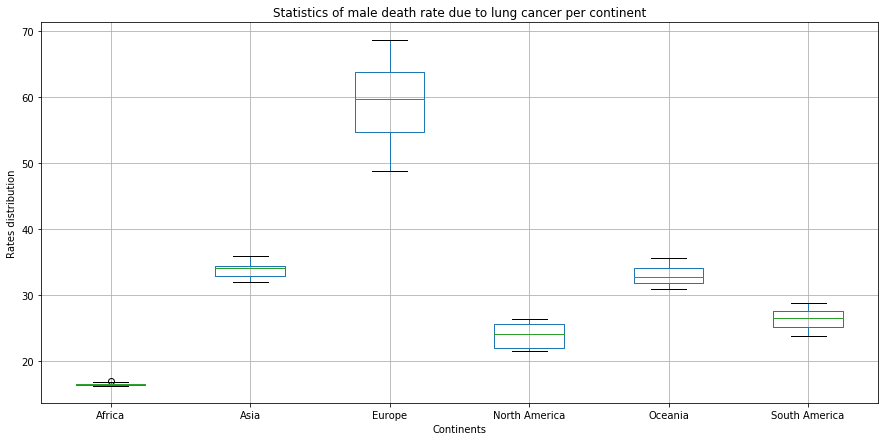

In [54]:
df_mean_death_m_continent_t.boxplot(column=list(df_mean_death_m_continent_t.columns[1:].values), figsize=(15,7));
# Add title and axis names
plt.title('Statistics of male death rate due to lung cancer per continent')
plt.xlabel('Continents')
plt.ylabel('Rates distribution');

**Countries in Africa has the lowest male death rate due to lung cancer. The highest male death rate due to lung cancer are in Europe.**

Per continent death rate has different behavior (skewed left/right)

### 2.3. Analyse data of new cancer cases for women

Perform the same analysis as for death rate for women

In [55]:
df_new_f.head(2)

,country,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,9.66,9.55,9.49,9.34,9.22,9.12,9.05,9.02,8.92,...,8.97,9.04,9.12,9.22,9.27,9.35,9.43,9.50,9.56,9.63
1,Albania,9.08,9.37,9.67,10.30,10.80,11.30,11.70,12.20,12.10,...,10.70,10.50,10.30,10.00,9.94,9.86,9.79,9.72,9.66,9.59


In [56]:
df_new_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 25 columns):
country    187 non-null object
1993       187 non-null float64
1994       187 non-null float64
1995       187 non-null float64
1996       187 non-null float64
1997       187 non-null float64
1998       187 non-null float64
1999       187 non-null float64
2000       187 non-null float64
2001       187 non-null float64
2002       187 non-null float64
2003       187 non-null float64
2004       187 non-null float64
2005       187 non-null float64
2006       187 non-null float64
2007       187 non-null float64
2008       187 non-null float64
2009       187 non-null float64
2010       187 non-null float64
2011       187 non-null float64
2012       187 non-null float64
2013       187 non-null float64
2014       187 non-null float64
2015       187 non-null float64
2016       187 non-null float64
dtypes: float64(24), object(1)
memory usage: 36.6+ KB


In [57]:
df_new_f.describe()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,9.331979,9.429144,9.544439,9.570535,9.641711,9.697059,9.768503,9.910535,9.995882,10.088824,...,10.632781,10.728770,10.801658,10.907219,10.951872,11.000802,11.028503,11.022888,11.003316,10.988396
std,7.396734,7.575735,7.744991,7.816559,7.903827,7.995716,8.114099,8.286548,8.439365,8.573560,...,9.143166,9.228633,9.308113,9.446974,9.505469,9.549840,9.551219,9.529419,9.464527,9.395054
min,1.900000,1.870000,1.850000,1.870000,1.900000,1.930000,1.960000,1.990000,2.000000,2.010000,...,2.100000,2.120000,2.140000,2.160000,2.180000,2.210000,2.240000,2.270000,2.300000,2.330000
25%,4.635000,4.625000,4.615000,4.445000,4.350000,4.310000,4.280000,4.380000,4.365000,4.330000,...,4.450000,4.480000,4.520000,4.570000,4.595000,4.620000,4.640000,4.675000,4.715000,4.740000
50%,7.360000,7.400000,7.390000,7.250000,7.350000,7.240000,7.340000,7.560000,7.580000,7.510000,...,7.880000,7.930000,7.950000,8.050000,8.050000,8.120000,8.170000,8.200000,8.190000,8.140000
75%,11.250000,11.400000,11.400000,11.100000,10.950000,11.050000,11.200000,11.450000,11.700000,12.000000,...,12.250000,12.500000,12.400000,12.350000,12.250000,12.200000,12.250000,12.250000,12.200000,12.100000
max,52.100000,51.600000,51.000000,50.200000,49.300000,48.400000,47.800000,48.500000,48.900000,48.900000,...,47.800000,48.000000,48.200000,48.700000,49.100000,49.000000,48.400000,47.200000,46.400000,46.300000


Plot histograms for some year, here I used 1993, 2000, 2008 and 2016

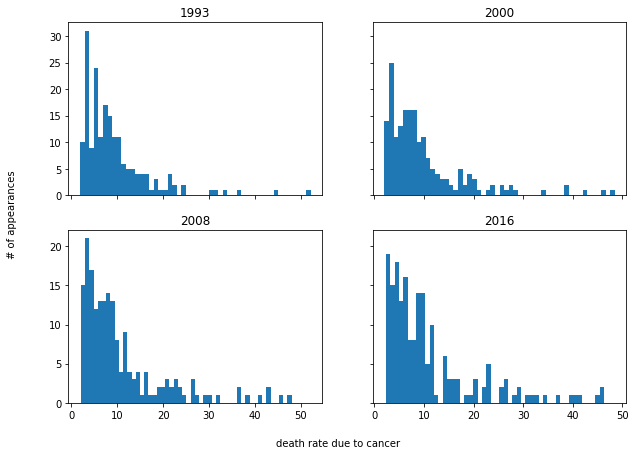

In [58]:
# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,7))

ax1.hist(df_new_f['1993'], bins=50);
ax1.set_title('1993')
ax2.hist(df_new_f['2000'], bins=50);
ax2.set_title('2000')
ax3.hist(df_new_f['2008'], bins=50);
ax3.set_title('2008')
ax4.hist(df_new_f['2016'], bins=50);
ax4.set_title('2016')

f.text(0.5, 0.04, 'death rate due to cancer', ha='center')
f.text(0.04, 0.5, '# of appearances', va='center', rotation='vertical');

Find countries with maximum and minimum death rate due to lung cancer and it's appearances per year

In [59]:
min_max_cancer_rate(df_new_f)

Frequesncy of countries with minimum cancer rate
Djibouti    24
dtype: int64
Frequesncy of countries with maximum cancer rate
Denmark          9
United States    8
North Korea      6
Iceland          1
dtype: int64


#### Plot cancer data for some cities per year

In [60]:
df_new_f_t=transpose_df_func(df_new_f)

In [61]:
# add column with mean value per all countries
df_new_f_t['all_countries']=df_new_f_t.iloc[:, 1:].mean(axis=1)

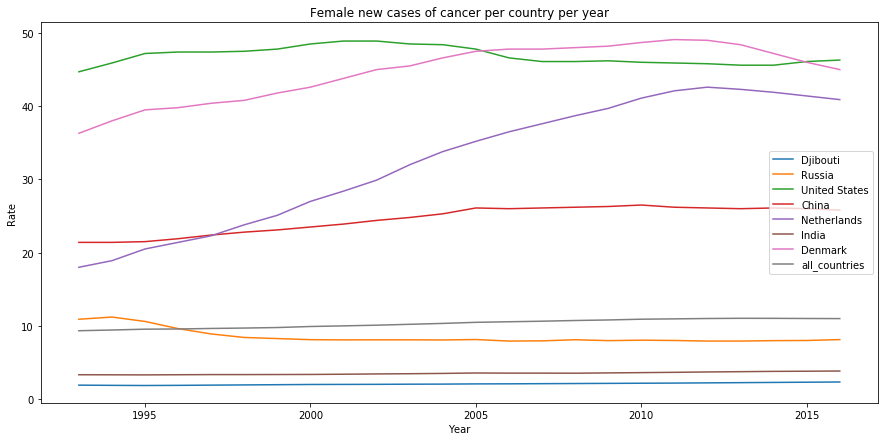

In [62]:
list_of_countries=['Djibouti', 'Russia', 'United States', 'China','Netherlands', 'India', 'Denmark', 'all_countries']
plot_country_year(df_new_f_t, list_of_countries )
plt.title('Female new cases of cancer per country per year');

I chose not to show combined plots per continent for this data set, but it can be done the same way as in 2.1 and 2.2

### 2.4. Analyse data of new cancer cases for men

Perform the same analysis as in 2.1-2.3

In [63]:
df_new_m.head(2)

,country,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,25.4,25.5,25.6,25.6,25.6,25.6,25.5,25.5,25.6,...,25.6,25.5,25.4,25.3,25.2,25.2,25.2,25.3,25.3,25.4
1,Albania,44.6,44.8,45.6,46.3,47.4,48.2,48.6,49.2,48.8,...,45.6,45.5,45.2,44.3,43.9,43.6,43.6,43.7,43.8,43.9


In [64]:
df_new_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 25 columns):
country    187 non-null object
1993       187 non-null float64
1994       187 non-null float64
1995       187 non-null float64
1996       187 non-null float64
1997       187 non-null float64
1998       187 non-null float64
1999       187 non-null float64
2000       187 non-null float64
2001       187 non-null float64
2002       187 non-null float64
2003       187 non-null float64
2004       187 non-null float64
2005       187 non-null float64
2006       187 non-null float64
2007       187 non-null float64
2008       187 non-null float64
2009       187 non-null float64
2010       187 non-null float64
2011       187 non-null float64
2012       187 non-null float64
2013       187 non-null float64
2014       187 non-null float64
2015       187 non-null float64
2016       187 non-null float64
dtypes: float64(24), object(1)
memory usage: 36.6+ KB


In [65]:
df_new_m.describe()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.00000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,35.270749,35.276364,35.139893,34.493690,33.959412,33.643209,33.40262,33.206952,33.032567,32.856150,...,32.020535,31.768717,31.487326,31.273422,30.942353,30.708503,30.409251,30.176043,30.000535,29.896524
std,27.801981,27.819473,27.492983,26.610761,25.980660,25.666043,25.39038,25.083854,24.916535,24.671981,...,23.609881,23.246108,22.824806,22.487944,22.105969,21.820834,21.415161,21.059264,20.780074,20.582724
min,4.110000,4.300000,4.510000,4.720000,4.940000,5.090000,5.07000,5.140000,4.990000,4.930000,...,4.740000,4.770000,4.800000,4.810000,4.830000,4.870000,4.880000,4.900000,4.930000,4.950000
25%,11.900000,11.950000,11.950000,11.900000,11.900000,11.750000,11.55000,11.700000,11.550000,11.450000,...,11.550000,11.550000,11.550000,11.500000,11.400000,11.550000,11.600000,11.600000,11.650000,11.750000
50%,25.900000,25.900000,25.700000,25.600000,25.600000,25.300000,25.30000,24.900000,24.900000,24.900000,...,25.000000,24.800000,24.600000,24.800000,24.300000,24.000000,23.700000,23.600000,23.400000,23.700000
75%,52.750000,54.200000,54.800000,54.100000,53.350000,52.600000,51.40000,50.850000,51.700000,52.000000,...,48.650000,49.000000,48.900000,48.550000,48.100000,48.450000,48.100000,48.000000,48.250000,48.000000
max,107.000000,105.000000,104.000000,105.000000,104.000000,104.000000,103.00000,102.000000,101.000000,101.000000,...,100.000000,99.000000,97.200000,94.700000,90.400000,86.800000,84.500000,83.700000,83.100000,82.500000


Plot histograms for some year, here I used 1993, 2000, 2008 and 2016

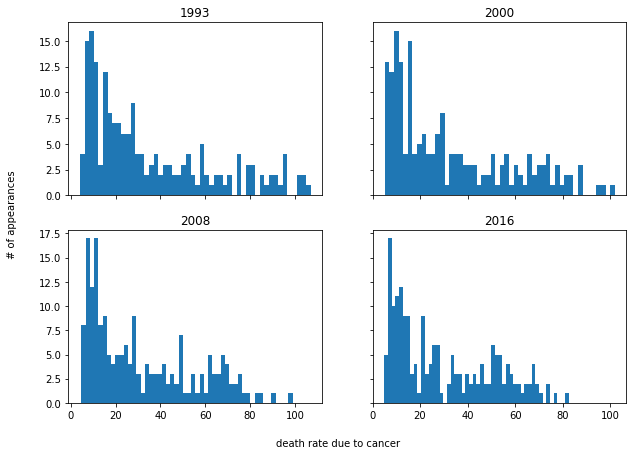

In [66]:
# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,7))

ax1.hist(df_new_m['1993'], bins=50);
ax1.set_title('1993')
ax2.hist(df_new_m['2000'], bins=50);
ax2.set_title('2000')
ax3.hist(df_new_m['2008'], bins=50);
ax3.set_title('2008')
ax4.hist(df_new_m['2016'], bins=50);
ax4.set_title('2016')

f.text(0.5, 0.04, 'death rate due to cancer', ha='center')
f.text(0.04, 0.5, '# of appearances', va='center', rotation='vertical');

Find countries with maximum and minimum death rate due to lung cancer and it's appearances per year

In [67]:
min_max_cancer_rate(df_new_m)

Frequesncy of countries with minimum cancer rate
Kenya     19
Zambia     5
dtype: int64
Frequesncy of countries with maximum cancer rate
Hungary        18
North Korea     4
Russia          1
Belgium         1
dtype: int64


#### Plot cancer data for some cities per year

In [68]:
df_new_m_t=transpose_df_func(df_new_m)

In [69]:
# add column with mean value per all countries
df_new_m_t['all_countries']=df_new_m_t.iloc[:, 1:].mean(axis=1)

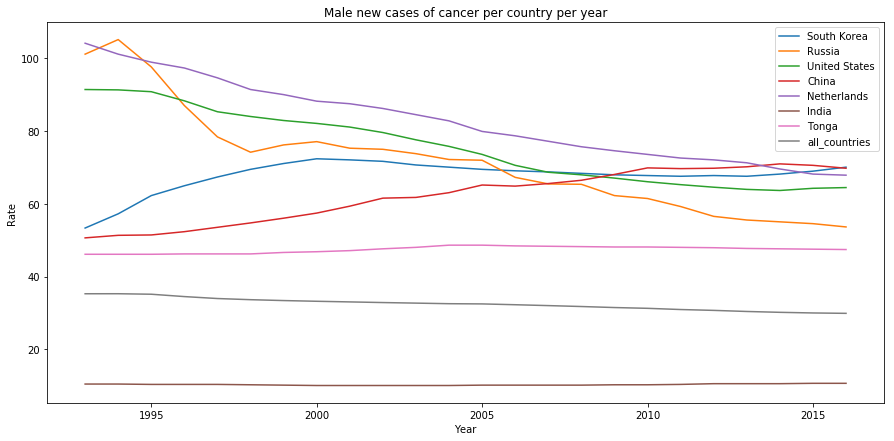

In [70]:
list_of_countries=['South Korea', 'Russia', 'United States', 'China','Netherlands', 'India', 'Tonga', 'all_countries']
plot_country_year(df_new_m_t, list_of_countries )
plt.title('Male new cases of cancer per country per year');

I chose not to show combined plots per continent for this data set, but it can be done the same way as in 2.1 and 2.2

<a id='eda2d'></a>
## 3. Exploratory Data Analysis - Multi variable (2d)

### 3.1 Death rate due to lung cancer Vs new cancer cases (female)

Calculate correlation coefficient between mean rates for each country

In [71]:
x=df_death_f_transpose.iloc[:,1:-1].mean()
y=df_new_f_t.iloc[:,1:-1].mean()
np.corrcoef(x,y)

array([[1.        , 0.97337854],
       [0.97337854, 1.        ]])

Correlation coef close to 1 indicates strong correlation

In [72]:
# check that we compare vectors of the same length 
x.shape, y.shape

((187,), (187,))

Visualise mean death rate and mean new appeacances of lung cancer

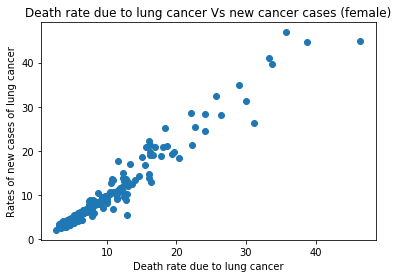

In [73]:
plt.scatter(x, y) 
# Add title and axis names
plt.title('Death rate due to lung cancer Vs new cancer cases (female)')
plt.xlabel('Death rate due to lung cancer')
plt.ylabel('Rates of new cases of lung cancer');

In [74]:
from scipy.stats import ttest_ind
# Perform t-test 
t_test_serv_GDP = ttest_ind(x,y) # Imported from Sci-Py Stats
t_test_serv_GDP

Ttest_indResult(statistic=-0.06506171337987608, pvalue=0.9481598128158114)

P value is really high, so variables most probably are dependent. And as we seen in 1-d analysis the death rate per country and new cancer cases follow similar trends. 

### 3.2 Compare death due to lung  for men and women

In [75]:
x=df_death_f_transpose.iloc[:,1:-1].mean()
y=df_death_m_t.iloc[:,1:-1].mean()
np.corrcoef(x,y)

array([[1.        , 0.67131309],
       [0.67131309, 1.        ]])

The correlation coef of 0.67 shows some moderate relation between variables

In [76]:
x.shape, y.shape

((187,), (187,))

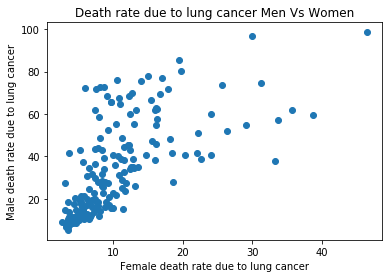

In [77]:
plt.scatter(x, y) 
# Add title and axis names
plt.title('Death rate due to lung cancer Men Vs Women')
plt.xlabel('Female death rate due to lung cancer')
plt.ylabel('Male death rate due to lung cancer');

In [78]:
from scipy.stats import ttest_ind
# Perform t-test on Service Employment ratio and GDP
t_test_serv_GDP = ttest_ind(x,y) # Imported from Sci-Py Stats
t_test_serv_GDP

Ttest_indResult(statistic=-13.311485625163602, pvalue=2.4623932198726733e-33)

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, 
so we reject the null hypothesis that there is dependency between female and male death rate due to lung cancer

### 3.3. Female death rate due lung cancer Vs Income 

In [79]:
df_income_t=transpose_df_func(df_income_clean)

In [80]:
# add column with mean value per all countries
df_income_t['all_countries']=df_income_t.iloc[:, 1:].mean(axis=1)

In [81]:
x=df_death_f_transpose.iloc[:,1:-1].mean()
y= df_income_t.iloc[:,1:-1].mean()
np.corrcoef(x,y)

array([[1.        , 0.39865922],
       [0.39865922, 1.        ]])

Correlation coef lower then 0.5 tells us that probably there is no correlation between this variables

In [82]:
x.shape, y.shape

((187,), (187,))

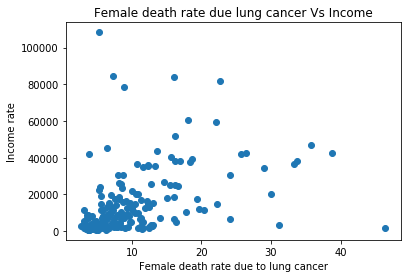

In [83]:
plt.scatter(x, y) 
plt.title('Female death rate due lung cancer Vs Income')
plt.xlabel('Female death rate due to lung cancer')
plt.ylabel('Income rate');

In [84]:
from scipy.stats import ttest_ind
# Perform t-test on Service Employment ratio and GDP
t_test_serv_GDP = ttest_ind(x,y) # Imported from Sci-Py Stats
t_test_serv_GDP

Ttest_indResult(statistic=-11.266374876132751, pvalue=1.5692660544690726e-25)

P-value is small, so we reject the null hypothesis 

<a id='conclusions'></a>
## Conclusions

The considered data of lung cancer rate is normalised over 100,000 citizens of specific country and gender. It allows us to skip the step of normalisation of data per country & gender and process with analysis of rate behaviour between countries/continents. 

However, the data used in this analysis is limited to 13 years only (1993-2016). That is not sufficient to observe any clear pattern of cancer rate over years and make any conclusions of increase/decrease of cancer in specific country and gender. 

Let's see which question from the beginning of this analysis we managed to answer.

- Is there any difference/similarity in death rate due to cancer between female and male data? 

> Differences: Female and male death range lies in different interval, for female it's in interval [2 - 50] and for male in interval [4.5 - 106]. Furthermore, countries with minimum death rate differs per gender.

> Similarities: For both genders African countries has the lowest death rate due to lung cancer and Europe shows the highest death rate.

- Is there any dependencies between new cases and death rate? 

> Correlation coefficient and t-test p-value shows strong correlation between new and death cases due to lung cancer for women.

- Which country has the highest/ lowest death rate due to lung cancer? 

> For female dataset: highest - North Korea, lowest - Djibouti

> For male dataset: highest - North Korea and Hungary, lowest - Kenya

- Is there dependency between death rate due to lung cancer and income? 

> Correlation coefficient and t-test p-value don't show correlation between this variables